<a href="https://colab.research.google.com/github/wonyoung-ji/statistics/blob/master/study/201010_11%EC%9E%A5_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()

mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# 회귀분석

# 1.회귀분석 기초
- 회귀: 평균으로 되돌아감. 즉, 독립변수가 아무리 크거나 작더라도, 종속변수는 종속변수 집단의 평균으로 접근한다는 뜻
- __회귀분석__
  + __개별 독립변수의 변화가 종속변수의 변화에 어떻게 영향을 미치는지__ 판단
  + 독립변수와 종속변수 간 인과관계 검증
  + 독립변수 = 수치형 변수
  + 종속변수 = 수치형 변수





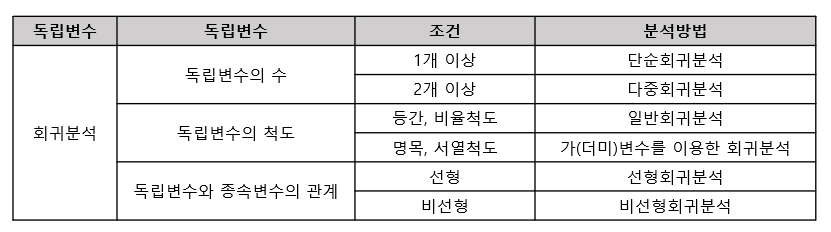

- 회귀분석 전제조건
  + __선형성__: 독립변수와 종속변수 간에는 선형관계가 존재한다
  + __등분산성__: 잔차들은 동일한 분산을 갖는다
  + __독립성__: 잔차들은 서로 독립이다
  + __정규성__: 잔차의 평균은 0이며, 분산이 image.png인 정규분포를 따른다


# 2.단순회귀분석


## 2.1.개념 및 주요 이론
- 단순회귀분석; 1개의 수치형 독립변수(고객만족도)가 1개의 수치형 종속변수(구매액)에 어떠한 영향을 미치는 지 검정
- 단순회귀모형
 + 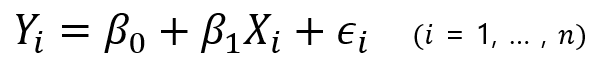
 + 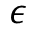 = __잔차(오차)__, 서로 독립이며 평균 0 분산image.png인 정규분포를 따르는 확률변수

- 회귀식
  + 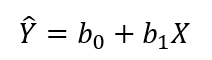
   + 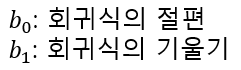

- 모형을 도출하는 방법 / 설명력 나타내는 방법 / 모형 적합성을 객관적으로 확인하는 방법


### 2.1.1.최소제곱법

 + 최소제곱법 = __회귀모형추정 방법(데이터를 바탕으로 적절한 회귀직선을 구함) 중 하나__
 + 오차제곱합을 최소로하는 image.png와의 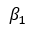를 구하는 것
  + 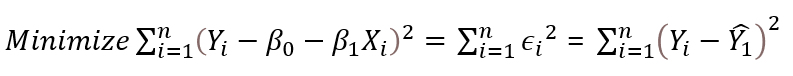
  + 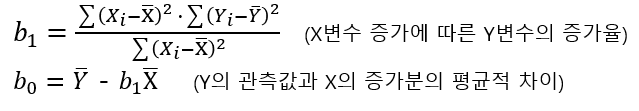
  
- 회귀식과 잔차의 예시


   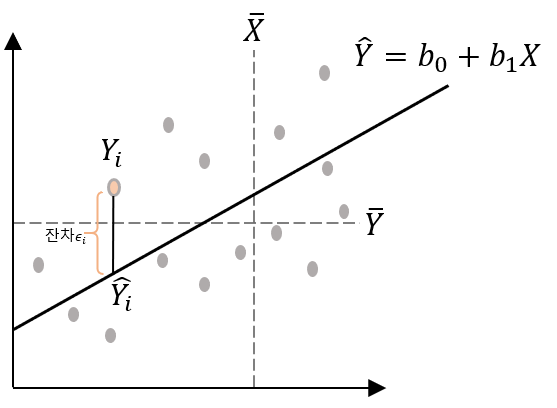

### 2.1.2.결정계수
- 결정계수 = 회귀직선을 적합 시킨 후에 회귀선의 설명력을 나타내는 지표
- image.png을 사용
- 종속변수의 총 제곱합 중에서 회귀직선에 의해 설명된 제곱합의 비율
- 0과 1 사이의 값
- 1에 가까울 수록 회귀직선의 설명력이 높음
- 단순회귀모형의 결정계수 = 독립변수와 종속변수간 상관계수의 제곱
  + 예) 상관계수 0.9(or -0.9)일 때, 결정계수 0.81
  + 해당 상관계수는, 종속변수의 총 제곱합 중 약 81%가 적합된 회귀직선에 의해 설명됨을 의미

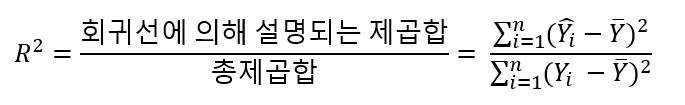

### 2.1.3.회귀분석의 적합성 평가
- 회귀분석의 통계적 유의성 평가를 위해 분산분석표를 활용
- 즉, 회귀분석 = 독립변수에 따라 종속변수의 평균을 나타내는 __회귀선과__, 실제 관측치가 회귀선으로 부터 떨어져있는 __잔차와 비교하여 통계적으로 유의하게 다른가 분석__
- 잔차그림(종속변수 추정치와 잔차간 산점도, 독립변수 추정치와 잔차간의 산점도)을 통해 회귀모형의 가정 확인



## 2.2.분석 및 해석
- 쇼핑몰의 방문빈도와 매출액 인과관계를 회귀분석을 통해 확인
- 귀무가설 = 방문빈도는 총 매출액에 영향을 미치지 않는다
- 연구가설 = 방문빈도는 총 매출액에 영향을 미친다

In [3]:
import pandas as pd
import statsmodels.formula.api as smf
df = pd.read_csv('/content/gdrive/My Drive/통계/Ashopping.csv',sep=',',encoding='CP949')
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6


- statsmodels: 회귀분석 실행
- .formula.api: statsmodels의 서브모듈. 수식 문자열과 데이터프레임을 사용해 모델을 편리하게 사용가능

In [30]:
# 단순회귀분석 실행
model1 = smf.ols(formula = '총_매출액 ~ 방문빈도', data = df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  총_매출액   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     660.8
Date:                Sat, 10 Oct 2020   Prob (F-statistic):          3.05e-112
Time:                        09:02:57   Log-Likelihood:                -16921.
No. Observations:                1000   AIC:                         3.385e+04
Df Residuals:                     998   BIC:                         3.386e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.572e+06   2.74e+05      5.743      0.0

- ols(): 회귀분석 지원
- __첫 번째 테이블: 회귀분석의 일반적인 사항__
  + Dep. Variable: 종속변수
  + R-squared: 결정계수. 1에 가까울 수록 설명력이 높음
  + Model: 사용한 분석 모델(OLS)
  + Method: 분석모델의 계산방식(최소제곱법)
  + F-statistics: 회귀모델의 적합도 통계량
  + Prob(F-statistic): F통계량 유의확률. 0에 가까울수록 유의미
  + Df Residuals: 잔차의 자유도
  + AIC, BIC: 복수개 모형의 적합도 비교시 사용(해당 회귀모델은 해당X)
- __두 번째 테이블: 회귀계수 테이블__
  + Intercept: y절편. (y= bx + a에서 a의 값)
  + std err: 계수 추정치의 표준오차
  + t: t-value
  + P>|t|: 유의확률
  + [0.025	0.975]: 95% 신뢰구간의 상한값 및 하한값
- __세 번째 테이블: 잔차의 분포 평가__
  + Omnibus: 잔차의 왜도와 첨도. 0에 가까울수록 정규분포 따름
  + Prob(Omnibus): Omnibus의 p-value. 귀무가설로서 정규분포인지 판단
  + Durbin-Watson: 회귀분석시 잔차의 독립성. 2에 가까울수록 독립적

In [10]:
# 선형회귀선 출력
import numpy as np
fit = np.polyfit(df['방문빈도'],df['총_매출액'],1)
fit_fn = np.poly1d(fit)
print(np.round(fit,3))
print(fit_fn)

[ 206622.163 1572126.981]
 
2.066e+05 x + 1.572e+06


- polyfit(): 특정 차수의 다항식 생성
  + polyfit(독립변수, 종속변수, 차수)
  + 해당 회귀선은 1차이므로 1 입력
  + 출력된 계수들은 앞서 OLS에서 나온 계수와 일치
- poly1d(): 해당 계수들을 이용하여 선형회귀선 출력


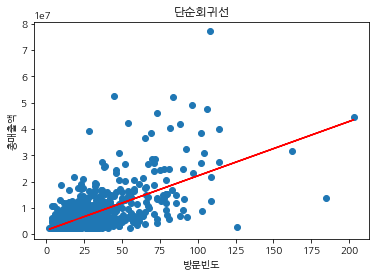

In [12]:
# 산점도와 선형회귀선 출력
plt.title('단순회귀선')
plt.xlabel('방문빈도')
plt.ylabel('총매출액')
plt.plot(df['방문빈도'],df['총_매출액'], 'o')
plt.plot(df['방문빈도'],fit_fn(df['방문빈도']),'r')

- 산점도의 마커는 'o'로 설정
- 회귀선 표현에서는 x = 방문빈도, y = 1차 함수식/에 x의 값을 넣었을 때의 값 지정
- 결과
  + 유의확률(Prob(F-statistic))은 0.00 이하
  + 설명력(image.png)은 39.8%
  + 회귀식: 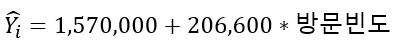
  + 즉, 방문빈도 1회가 증가할수록 총 매출액이 206,600원이 증가

# 3.다중회귀분석

## 3.1.개념 및 주요 이론
- 다중회귀분석: 2개 이상의 독립변수가 1개의 수치형 종속변수에 어떠한 영향을 미치는지 검정
  + 예: 서비스만족도, 방문횟수, 거래기간 -> 총 구매액
- 다중회귀모형: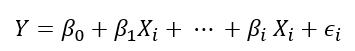
- 회귀식
  + 단순회귀분석과 마찬가지로 최소제곱법 사용
  + 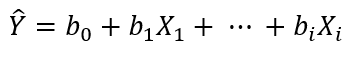

- 결정계수
  + 단순회귀분석과 마찬가지로 image.png 사용
  + 1에 가까울수록 회귀모형의 설명력이 높음
  + 다중회귀분석에서는 독립변수가 추가되면서 결정계수 값이 증가하기 때문에, __결정계수 값이 높은 모형이 좋은 모형이라고 단정 불가__
  + __수정결정계수 (Adjusted image.png)__을 사용
  + 수정결정계수는 증가하다가 다시 감소하기 때문에 __수정결정계수 값이 최대가 되도록 모형을 선택__

### 3.1.1.다중공선성
- 다중공선성 판별
  + 분산팽창계수(VIF: Variance Inflation Factor) 사용
  + 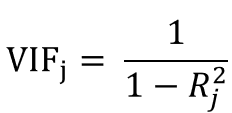
  + 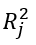: 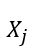를 종속변수로, 나머지 독립변수들을 독립변수로 하는 다중회귀모형에 적합시켰을 때 얻어지는 결정계수
  - 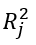이 1에 가까운 것은 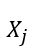가 다른 독립변수들과 강한 선형관계가 있음을 의미
  + __VIF가 10보다 크면 다중공선성이 있음__으로 판단

-  __다중공선성 높을 때 회귀계수들의 분산이 커지며, 비정상적인 회귀계수 값 도출될 수 있음__
  + 독립변수들 중 상관관계가 높은 변수가 있을 경우
  + 여러 독립변수들 간 선형관계가 존재할 경우
- 해결방법
  + 상관관계가 높은 변수들 중 일부 제거 후 재적합
  + 주성분회귀(Principal Component Regression) or 능형회귀(Ridge Regression) 등 새로운 통계 모형 적용

### 3.1.2.독립변수 선택 방법
- 독립변수가 많아지면 다중공선성과 같은 문제 발생하므로, 꼭 필요한 변수들을 사용해야 함
- 좋은 회귀모형 = 적은 수의 독립변수로 종속변수의 분산을 많이 설명하는 모형
- 선택 방법
 + __전체입력__: 임의로 지정한 모든 변수를 독립변수로 사용
 + __전진선택__: 가장 중요한 변수 순서로 하나씩 독립변수로 설정후, 회귀분석 진행. F값이 가장 큰 모형을 찾아 해당 변수를 우선 선택
 + __후진제거__: 불필요한 변수 하나씩 제거. 모든 변수를 독립변수로 설정 후 유의하지 않은 변수들 하나씩 제거
 + __단계선택__: 전진선택을 이용하여 하나씩 선택 + 다중공선성이 높인 변수를 후진제거방식으로 제거


## 3.2.분석 및 해석
- 쇼핑몰의 서비스만족도, 방문빈도, 구매카테고리 수가 총 매출액에 미치는 영향을 다중회귀분석을 통해 분석
- 귀무가설 = 서비스만족도, 방문빈도, 구매카테고리 수는 총 매출액에 영향을 미치지 않는다
- 연구가설 = 서비스만족도, 방문빈도, 구매카테고리 수는 총 매출액에 영향을 미친다

In [17]:
import statsmodels.formula.api as smf
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv('/content/gdrive/My Drive/통계/Ashopping.csv',sep=',',encoding='CP949')
df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6


- __pasty__: 다중공선성 확인 위한 회귀분석 전처리 지원 및 데이터프레임 가공하여 인코딩, 변환 등을 쉽게 할 수 있음
- __stats.outliers_influence__: 단순회귀분석과 관련된 기능 제공 및 분산팽창값(VIF) 구할 수 있음

In [19]:
# 다중회귀분석 실행
model2 = smf.ols(formula = '총_매출액 ~ 서비스_만족도 + 방문빈도 + 구매_카테고리_수',data= df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  총_매출액   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     230.8
Date:                Sat, 10 Oct 2020   Prob (F-statistic):          1.19e-113
Time:                        08:15:41   Log-Likelihood:                -16911.
No. Observations:                1000   AIC:                         3.383e+04
Df Residuals:                     996   BIC:                         3.385e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.033e+06   1.01e+06      2.009      0.0

- 첫 번째 테이블
  - F값 = 230.8
  - Prob(F-statistic) < 0.000 이므로 회귀모형 유의
  - Adjusted R-squared = 40.8% 
- 두 번째 테이블
  - 절편과 독립변수 모두 95% 신뢰수준에서 유의
  - 회귀식 = 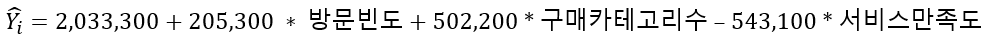
- 세 번째 테이블
  + 잔차 통계량 확인 결과 특이점 없음

In [21]:
# 다중공선성 확인
y, X = dmatrices('총_매출액 ~ 서비스_만족도 + 방문빈도 + 구매_카테고리_수',data = df, return_type = 'dataframe')
print(np.round(variance_inflation_factor(X.values, 1),3))   # 서비스만족도 VIF 값
print(np.round(variance_inflation_factor(X.values, 2),3))   # 방문빈도 VIF 값
print(np.round(variance_inflation_factor(X.values, 3),3))   # 구매카테고리수 VIF 값

1.139
1.259
1.215


- 분산팽창값(VIF) 모두 10 이하 이므로 다중공선성 문제 없음

- 결과
  + 총 매출액을 설명하는 3가지 독립변수 모두 유의미
  + 방문빈도 및 구매카테고리수는 양의 영향
  + 서비스만족도는 음의 영향 (추가적인 심도 있는 연구조사 필요해 보임)

# 4.더미변수를 이용한 회귀분석

## 4.1.개념 및 주요 이론
- 다중회귀분석시 __독립변수로 범주형 변수가 포함될 때__, 더미변수 이용
  + 예: 서비스만족도, 방문빈도(수치형 변수)외에도 구매유형(범주형 요인)이 구매액에 영향을 미칠 수도 있음

### 4.1.1.더미변수 설정 방법
- 더미변수의 개수 = (해당 범주형 변수의 수준 수 - 1)
- 예시
  + 연령대 범주형 변수 4개(20대, 30대, 40대, 50대)일 때 필요한 더미변수는 3개(V1 ,V2, V3)
  + V1변수 = 연령대가 '30대'이면 1, 아니면 0
  + V2변수 = 연령대가 '40대'이면 1, 아니면 0
  + V3변수 = 연령대가 '50대'이면 1, 아니면 0
  + V1, V2, V3가 모두 0값일 경우 '20대'(기준범주)

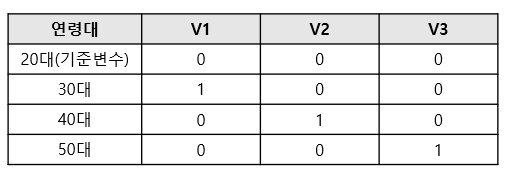

- 다중회귀모형: 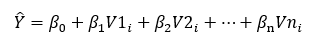

- 회귀식에 적용
  + (20대인경우) V1=0, V2=0, V3=0이므로,image.png
  + (30대인경우) V1=1,V2=0,V3=0이므로, 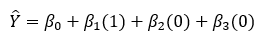
  + (40대인경우) V1=0,V2=1,V3=0이므로, 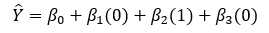
  + (50대인경우) V1=0,V2=0,V3=1이므로, 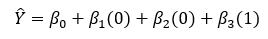

### 4.1.2.결과 해석 방법
- 위의 연령대에 따른 매출액 회귀모형에서 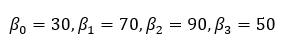로 추정되었을 때
 + 회귀식: 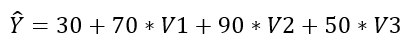
 + 20대는 연령대를 나타내는 더미변수의 기준
 + 30대는 20대에 비하여 매출액이 70만원 많음
 + 40대는 20대에 비하여 매출액이 90만원 많음
 + 50대는 20대에 비하여 매출액이 50만원 많음
 + __만약, 회귀계수의 유의확률에 따라 V3만 유의하면 50대의 경우에만 의미 부여 가능__

## 4.2.분석 및 해석
- 쇼핑몰의 구매유형(범주형데이터)을 더미변수화하여 방문빈도 예측하는 회귀모형 생성
- 귀무가설 = 각각의 구매유형은 방문빈도에 영향을 미치지 않는다
- 연구가설 = 각각의 구매유형은 방문빈도에 영향을 미친다

In [22]:
df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6


In [24]:
# 더미변수 생성
df2 = pd.get_dummies(df['구매유형'],prefix = '구매유형',drop_first=True)
df3 = pd.concat([df,df2],axis=1)
df2.head()

,구매유형_2,구매유형_3,구매유형_4
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0


- get_dummies()를 사용하여 더미변수 생성
  + get_dummies(data, prefix = '더미변수명', drop_fist = True/False)
  + prefix: 더미변수의 명칭
  + drop_first: 첫번째 범주 drop하여 기준범주로 사용할지 여부
  

In [29]:
# 더미변수를 이용한 회귀분석
Model3 = smf.ols(formula = '방문빈도 ~ 구매유형_2 + 구매유형_3 + 구매유형_4',data=df3).fit()
print(Model3.summary())

                            OLS Regression Results                            
Dep. Variable:                   방문빈도   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 10 Oct 2020   Prob (F-statistic):          8.42e-122
Time:                        09:02:49   Log-Likelihood:                -4193.5
No. Observations:                1000   AIC:                             8395.
Df Residuals:                     996   BIC:                             8415.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0233      2.450      4.092      0.0

- F-statistics = 252.4
- Prob(F-statistic) = 0.01 이하이므로 유효
- 설명력 약 43%
- 절편을 포함한 모든 더미변수들 또한 유의
- 결과
  + 회귀식: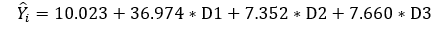
  + 구매유형이 1(1회성구매형)인 고객들의 방문횟수는 10.023회
  + 구매유형이 2(실용적구매형)인 고객들의 방문회수는 46.997회
  + 구매유형이 3(명품구매형)인 고객들의 방문회수는 17.375회
  + 구매유형이 4(집중구매형)인 고객들의 방문회수는 17.683회
  + 위의 값으로 예측가능